In [33]:
import numpy as np
import pandas as pd

In [34]:
data = pd.read_csv('../input/time-series-datasets/Electric_Production.csv')
data.rename(columns={'DATE':'date','IPG2211A2N':'production'},inplace=True)
data.tail()

,date,production
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
production,397.0,88.847218,15.387834,55.3151,77.1052,89.7795,100.5244,129.4048


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        397 non-null    object 
 1   production  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [37]:
data.isnull().sum()

date          0
production    0
dtype: int64

In [38]:
data['date'] = pd.to_datetime(data.date)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        397 non-null    datetime64[ns]
 1   production  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [40]:
data.set_index('date' ,inplace=True)

<Axes: xlabel='date'>

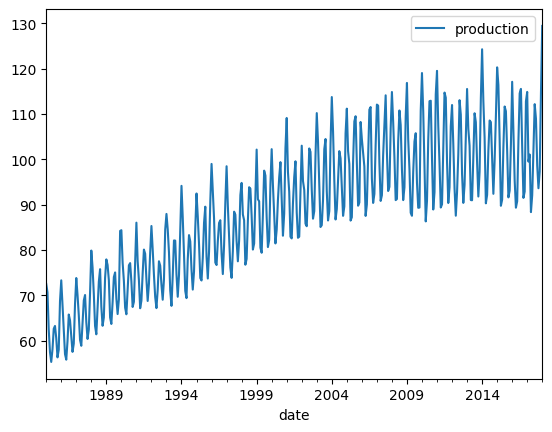

In [41]:
data[['production']].plot()

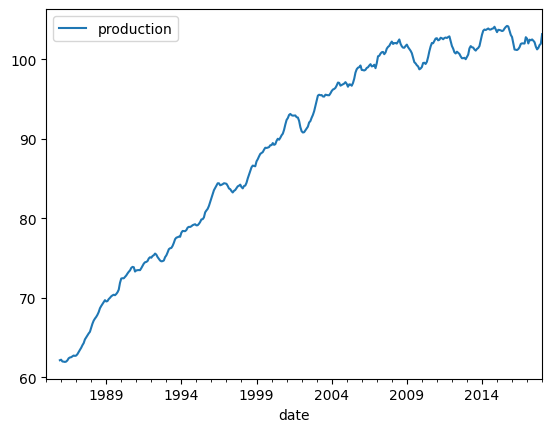

In [42]:
data_roll_production =data[['production']].rolling(12).mean().plot()

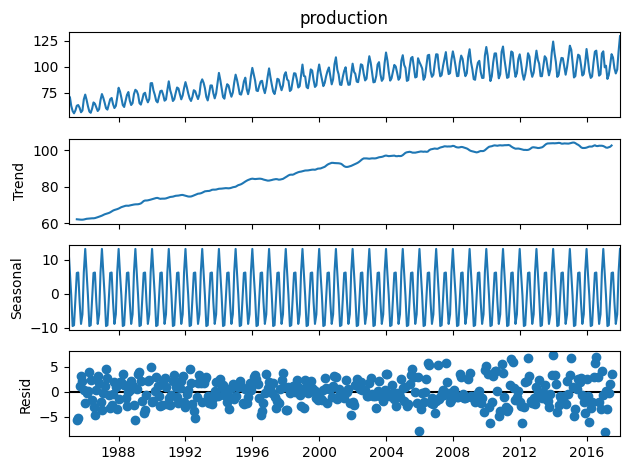

In [43]:
# Decomposing the data for better view of the data
 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x=data['production'],model='additive',period=12)
decomposition.plot()
plt.show()

In [44]:
data.shape

(397, 1)

In [47]:
df_test = data[['production']].iloc[300:]
df_train = data[[ 'production']].iloc[:299]

In [48]:
df_train.shape

(299, 1)

In [49]:
 
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df_train['production'],order=(2,1,3)).fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


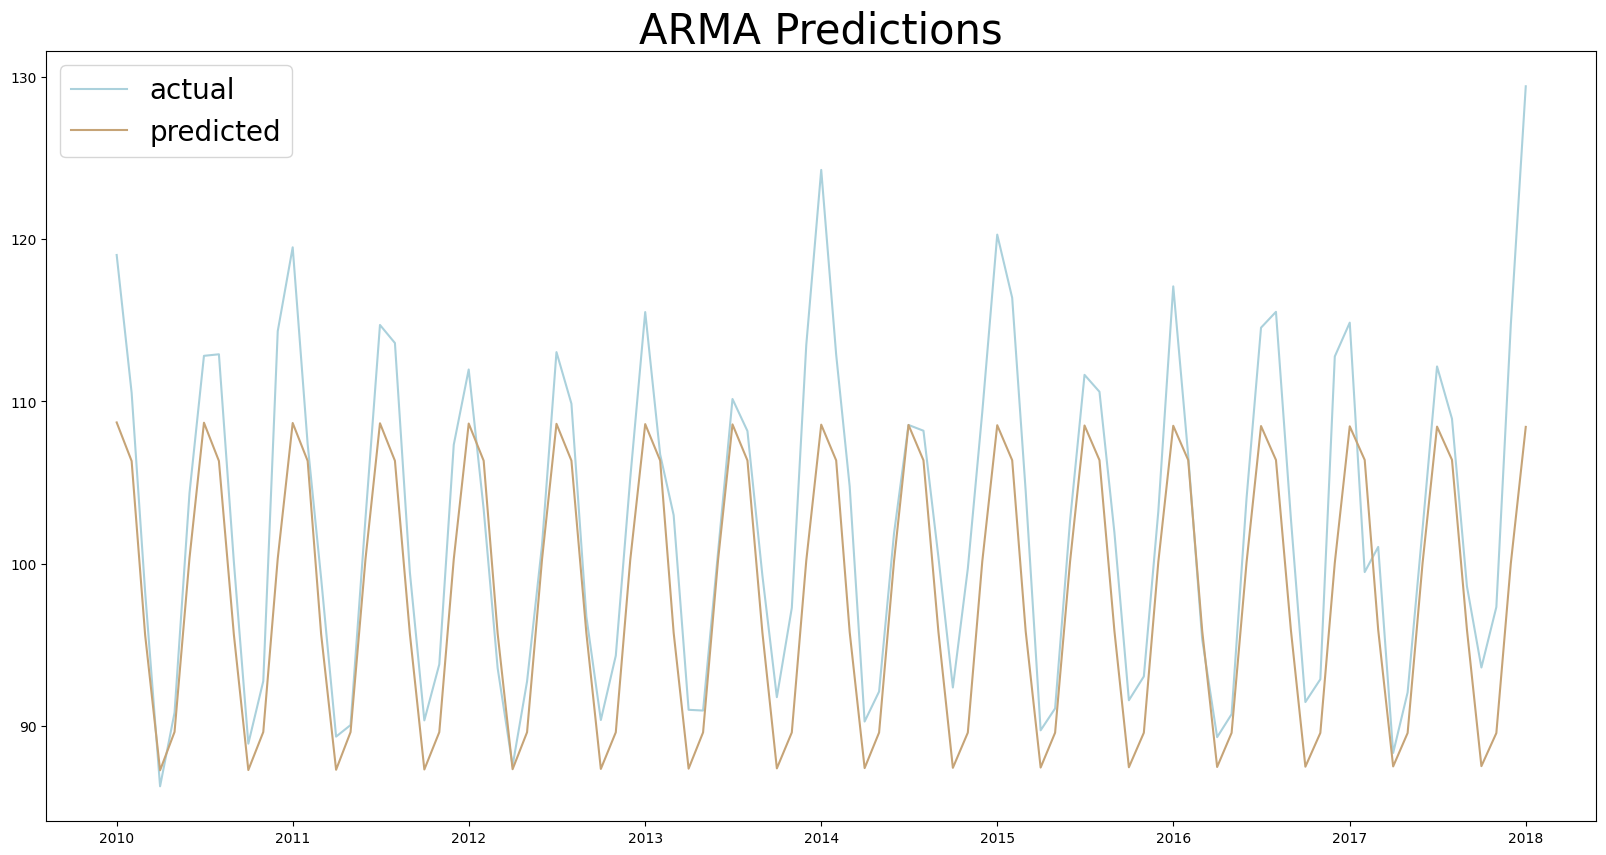

In [50]:
# generate predictions
df_pred = arima_model.predict(start= 300 , end= 396)
# plot actual vs. predicted
fig = plt.figure(figsize=(20, 10))
plt.title('ARMA Predictions', fontsize=30)
plt.plot(df_test['production'], label='actual', color='#ABD1DC')
plt.plot(df_pred, label='predicted', color='#C6A477')
plt.legend(fontsize =20, loc='upper left')


In [51]:
arima_model.forecast(5)

2009-12-01    100.370027
2010-01-01    108.704799
2010-02-01    106.328734
2010-03-01     95.619881
2010-04-01     87.282559
Freq: MS, Name: predicted_mean, dtype: float64

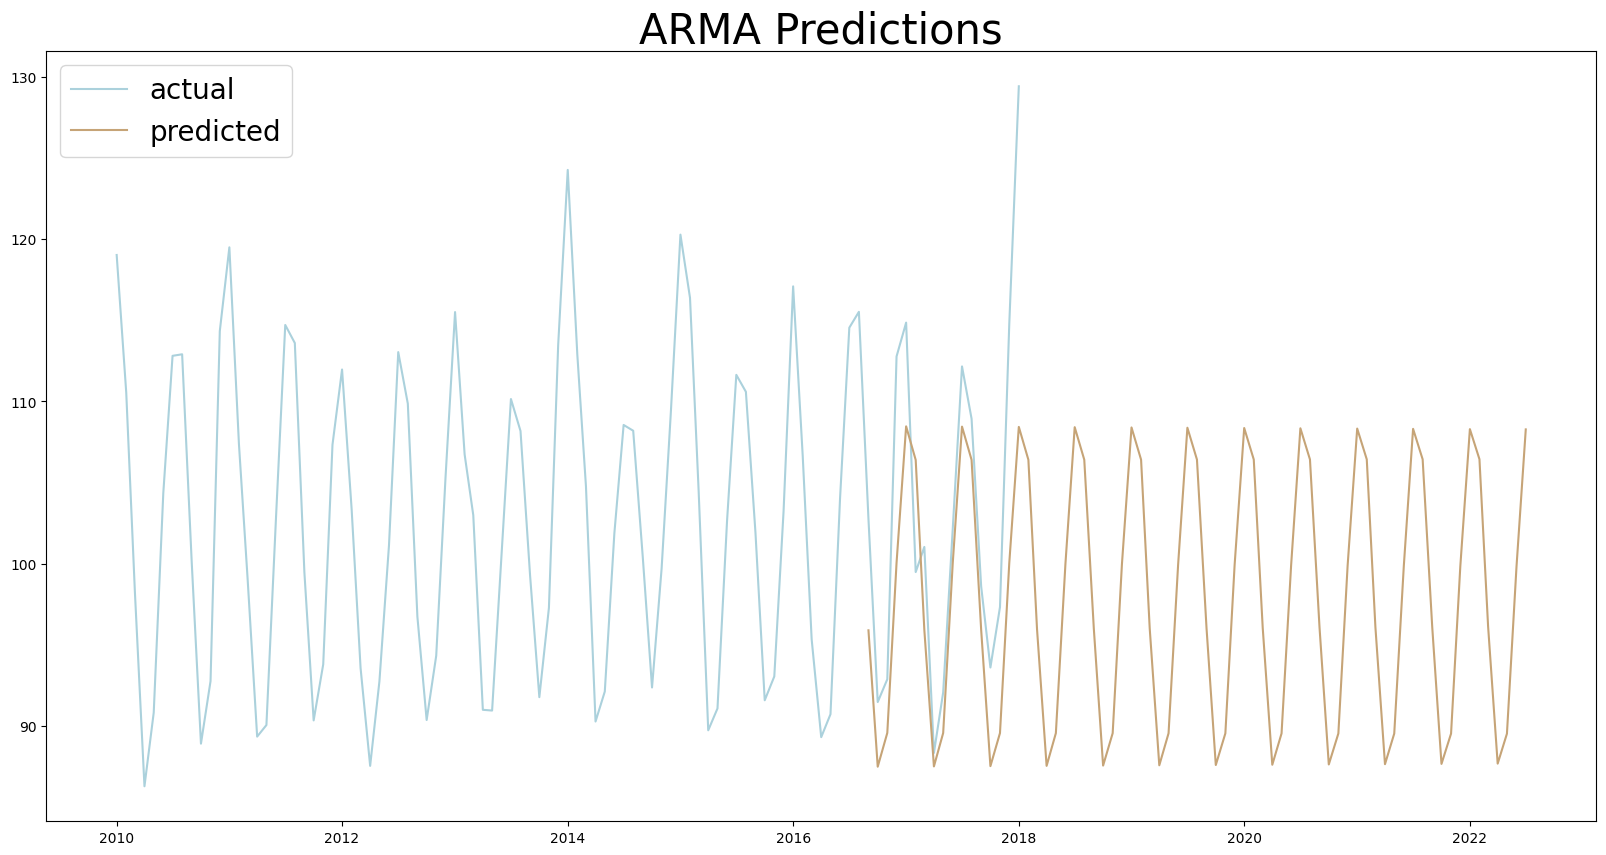

In [52]:
df_pred_upper_dataset = arima_model.predict(start= 380 , end= 450)
# plot actual vs. predicted
fig = plt.figure(figsize=(20, 10))
plt.title('ARMA Predictions', fontsize=30)
plt.plot(df_test['production'], label='actual', color='#ABD1DC')
plt.plot(df_pred_upper_dataset, label='predicted', color='#C6A477')
plt.legend(fontsize =20, loc='upper left')

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [55]:
rmse = sqrt(mean_squared_error(df_test['production'], df_pred))
print("RMSE:", round(rmse,2))
 

RMSE: 6.16


In [56]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  299
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -759.917
Date:                Fri, 20 Oct 2023   AIC                           1531.834
Time:                        16:26:49   BIC                           1554.016
Sample:                    01-01-1985   HQIC                          1540.713
                         - 11-01-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0003      0.002    516.138      0.000       0.997       1.004
ar.L2         -0.9997      0.001  -1405.633      0.000      -1.001      -0.998
ma.L1         -1.2075      0.057    -21.348      0.000      -1.318      -1.097
ma.L2          1.1535      0.066     17.545      0.000       1.025       1.282
ma.L3         -0.1543      0.055     -2.802      0.005      -0.262      -0.046
sigma2         9.1998      0.712     12.914      0.000       7.804      10.596
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.55
Prob(Q):                              0.88   Prob(JB):                         0.10
Heteroskedasticity (H):               1.64   Skew:                            -0.12
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""